`Ubuntu`操作系统下`matplotlib`中文乱码解决方案

+ 设置处理，[参考](https://segmentfault.com/a/1190000005144275)
+ 查找共同字体，[参考](http://www.cnblogs.com/arkenstone/p/6411055.html)

### 查找字体

以下操作的目的是，查找系统与`matplotlib`共同可使用的中文字体

In [1]:
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

output = subprocess.check_output(
    'fc-list :lang=zh -f "%{family}\n"', shell=True)
output = output.decode('utf-8')

zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

********** 可用的字体 **********
Droid Sans Fallback


配置字体系列(`font family`)

### 修改配置文件

#### 查找文件

In [2]:
import matplotlib

matplotlib.matplotlib_fname()

# 没有配置前，文件路径与以下路径类似
# '/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'
# 配置后，文件应类似于
# '/home/ldf/.config/matplotlib/matplotlibrc'

'/home/ldf/.config/matplotlib/matplotlibrc'

**拷贝字体**，网络查找字体文件并拷贝至`mpl-data/matplotlibrc/fonts/ttf/`目录下

#### 拷贝修改
如文件位置不在`~/config/matplotlib目录下，拷贝至该目录

打开配置文件
+ 注释`#font.family`，更改为`font.family:serif`
+ 注释`#font.serif`,  在字典值后首个位置添加可用的字体，本文为`Droid Sans Fallback`
+ 注释`#axes.unicode_minus`，更改为`True`

## 打印测试

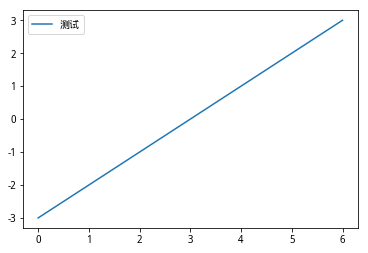

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(np.arange(-3, 4), label='测试')

ax.legend()
plt.show()